In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Loan_Data.csv')

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


<Axes: xlabel='Married', ylabel='count'>

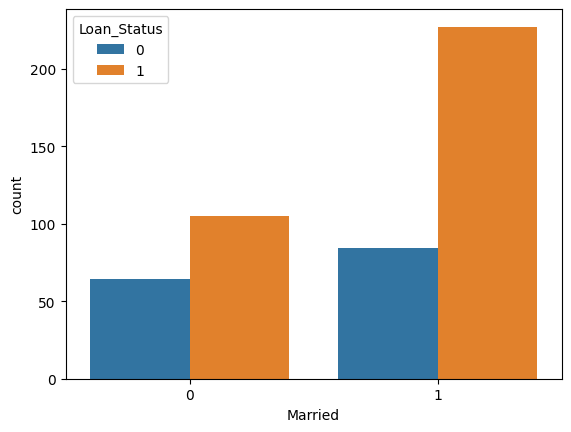

In [30]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Education', ylabel='count'>

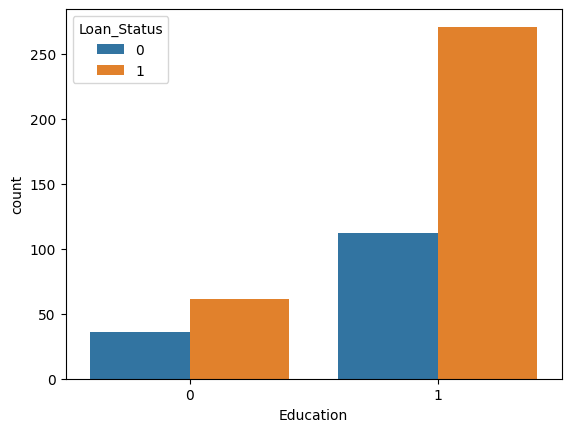

In [29]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

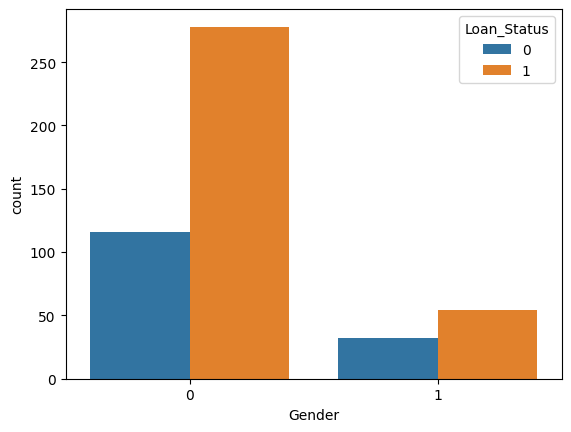

In [31]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

In [13]:
column_names = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for column_name in column_names:
    unique_values = data[column_name].unique()
    print(f"Unique values for {column_name}:")
    for value in unique_values:
        print(value)
    print('-'*50)

Unique values for Gender:
Male
Female
--------------------------------------------------
Unique values for Married:
Yes
No
--------------------------------------------------
Unique values for Education:
Graduate
Not Graduate
--------------------------------------------------
Unique values for Self_Employed:
No
Yes
--------------------------------------------------
Unique values for Property_Area:
Rural
Urban
Semiurban
--------------------------------------------------
Unique values for Loan_Status:
N
Y
--------------------------------------------------


In [14]:
data.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},
              'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},
              'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [15]:
data = data.replace(to_replace='3+',value=4)

In [16]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [17]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)

In [20]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)

(480, 11)
(384, 11)
(96, 11)


In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x, y)

LogisticRegression(random_state=0)

In [45]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_train)

tpredictions = clf.predict(X_test)

accuracy = accuracy_score(predictions,y_train)

taccuracy = accuracy_score(tpredictions,y_test)

print('The accuracy score on training dataset:',accuracy)
print('The accuracy score on testing dataset:',taccuracy)

The accuracy score on training dataset: 0.8020833333333334
The accuracy score on testing dataset: 0.8020833333333334


In [49]:
input_data = (0	,1,	1,	1,	0,	4583,	1508.0,	128.0,	360.0,	1.0,	0)
input_numpy_data = np.asarray(input_data)
input_reshape = input_numpy_data.reshape(1,-1)
prediction = clf.predict(input_reshape)
print(prediction)
if (prediction[0]== 0):
  print("Loan not Approved")
else:
  print("Loan Approved")

[1]
Loan Approved
